In [1]:
%%time
import sys
import logging

import numpy as np
import scipy as sp
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

CPU times: user 1.15 s, sys: 346 ms, total: 1.5 s
Wall time: 9.25 s


In [2]:
%%time
import requests, zipfile, io,json
import pandas as pd
from pandas import DataFrame , read_csv
import numpy as np
import os
from functools import reduce
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

%matplotlib inline

rcParams['figure.figsize'] = 6, 8
plt.style.use('ggplot')
sns.set_style("whitegrid")

CPU times: user 189 ms, sys: 69 ms, total: 258 ms
Wall time: 3.36 s


# Question 1: Load

•	Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found at https://github.com/CapitalOneRecruiting/DS

•	Please describe the structure of the data. Number of records and fields in each record?

•	Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.


In [23]:
%%time

path = '/Users/yuleinku/Desktop/project/modeling-project/data/transactions.txt'

with open(path) as myfile:
    df_ = pd.DataFrame([json.loads(line) for line in myfile])

CPU times: user 16.5 s, sys: 1.06 s, total: 17.6 s
Wall time: 17.1 s


In [24]:
df = df_.copy()

In [25]:
pd.options.display.max_columns = 30
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000.0,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000.0,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000.0,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False
3,733493772,733493772,5000.0,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,323.48,,,,False,,,False
4,733493772,733493772,5000.0,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False


In [5]:
print("Number of records: {} \nNumber of fields in each record: {}".format(df.shape[0], df.shape[1]))

Number of records: 641914 
Number of fields in each record: 29


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
accountNumber               641914 non-null object
accountOpenDate             641914 non-null object
acqCountry                  641914 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null object
cardLast4Digits             641914 non-null object
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
customerId                  641914 non-null object
dateOfLastAddressChange     641914 non-null object
echoBuffer                  641914 non-null object
enteredCVV                  641914 non-null object
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 non-null object
merchantCity             

In [7]:
def color_unique_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)==int:
        color = 'red' 
    else: 
        color = 'black'
    return 'color: %s' % color

In [8]:
stat = df.describe(include='all').T
stat_red = stat.style.applymap(color_unique_red)
stat_red

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
accountNumber,641914,5000,318001076,10034,nan,nan,nan,nan,nan,nan,nan
accountOpenDate,641914,1826,2015-12-11,10137,nan,nan,nan,nan,nan,nan,nan
acqCountry,641914,5,US,632303,nan,nan,nan,nan,nan,nan,nan
availableMoney,641914,nan,nan,nan,6652.83,9227.13,-1244.93,1114.97,3578.16,8169.18,50000
cardCVV,641914,899,633,11354,nan,nan,nan,nan,nan,nan,nan
cardLast4Digits,641914,5134,1789,10034,nan,nan,nan,nan,nan,nan,nan
cardPresent,641914,2,False,340453,nan,nan,nan,nan,nan,nan,nan
creditLimit,641914,nan,nan,nan,10697.2,11460.4,250,5000,7500,15000,50000
currentBalance,641914,nan,nan,nan,4044.38,5945.51,0,502.442,2151.86,5005.89,47496.5
currentExpDate,641914,165,05/2026,4209,nan,nan,nan,nan,nan,nan,nan


In [9]:
df.describe(include=[np.object]).T.style.applymap(color_unique_red)

,count,unique,top,freq
accountNumber,641914,5000,318001076,10034
accountOpenDate,641914,1826,2015-12-11,10137
acqCountry,641914,5,US,632303
cardCVV,641914,899,633,11354
cardLast4Digits,641914,5134,1789,10034
currentExpDate,641914,165,05/2026,4209
customerId,641914,5000,318001076,10034
dateOfLastAddressChange,641914,2186,2016-07-20,3948
echoBuffer,641914,1,,641914
enteredCVV,641914,980,633,11254


In [10]:
df.describe(include=[np.number]).T.style.applymap(color_unique_red)

,count,mean,std,min,25%,50%,75%,max
availableMoney,641914,6652.83,9227.13,-1244.93,1114.97,3578.16,8169.18,50000
creditLimit,641914,10697.2,11460.4,250,5000,7500,15000,50000
currentBalance,641914,4044.38,5945.51,0,502.442,2151.86,5005.89,47496.5
transactionAmount,641914,135.162,147.053,0,32.32,85.8,189.03,1825.25


In [11]:
df.replace('', np.nan, inplace=True)
df.isnull().sum()

accountNumber                    0
accountOpenDate                  0
acqCountry                    3913
availableMoney                   0
cardCVV                          0
cardLast4Digits                  0
cardPresent                      0
creditLimit                      0
currentBalance                   0
currentExpDate                   0
customerId                       0
dateOfLastAddressChange          0
echoBuffer                  641914
enteredCVV                       0
expirationDateKeyInMatch         0
isFraud                          0
merchantCategoryCode             0
merchantCity                641914
merchantCountryCode            624
merchantName                     0
merchantState               641914
merchantZip                 641914
posConditionCode               287
posEntryMode                  3345
posOnPremises               641914
recurringAuthInd            641914
transactionAmount                0
transactionDateTime              0
transactionType     

# Question 2: Plot

•	Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

•	Report any structure you find and any hypotheses you have about that structure.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11008f9b0>]], dtype=object)

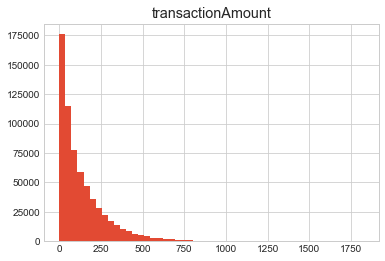

In [12]:
df.hist(column='transactionAmount', bins=50)

In [13]:
df['transactionAmount'].value_counts()

0.00       18479
3.42         120
4.94         119
8.78         118
3.56         113
7.91         112
33.79        112
8.49         110
5.10         108
53.86        104
3.47         102
42.30        101
5.84         101
4.55         100
8.57          99
7.68          98
6.44          98
5.33          97
8.66          96
39.37         96
8.21          96
4.25          96
45.53         95
54.20         95
7.87          95
4.51          94
8.65          94
5.01          94
3.98          93
8.50          92
           ...  
1024.13        1
609.94         1
609.69         1
870.65         1
452.96         1
541.36         1
705.51         1
535.82         1
623.06         1
961.83         1
528.82         1
432.96         1
766.55         1
336.62         1
315.91         1
472.26         1
528.07         1
531.93         1
761.95         1
585.62         1
639.16         1
365.57         1
472.01         1
761.70         1
531.43         1
961.33         1
962.67         1
883.09        

In [14]:
df[df['transactionAmount']==0]['transactionType'].value_counts()

ADDRESS_VERIFICATION    16478
PURCHASE                 1500
REVERSAL                  501
Name: transactionType, dtype: int64

In [15]:
df['transactionType'].value_counts()

PURCHASE                608685
ADDRESS_VERIFICATION     16478
REVERSAL                 16162
Name: transactionType, dtype: int64

In [16]:
16478/18479

0.8917149196385086

In [17]:
df['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', nan], dtype=object)

There are 18479 transactions whose amount are zero. And 16478 of them are ADDRESS_VERIFICATION, which is 89% of all zero dollar transactions.

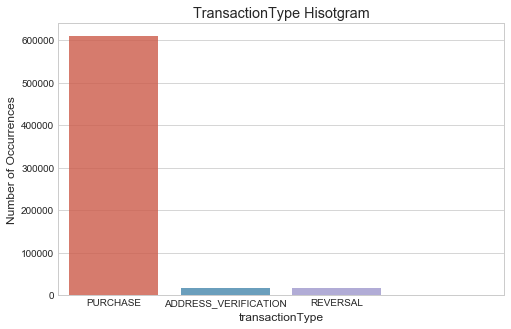

In [83]:
trans_count  = df['transactionType'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(trans_count.index, trans_count.values, alpha=0.8)
plt.title('TransactionType Hisotgram')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('transactionType', fontsize=12)
plt.show()

# Question 3: Data Wrangling - Duplicate Transactions

### Convert datetime

In [19]:
def convert_trans_datetime(data):
    data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'], format = "%Y-%m-%dT%H:%M:%S")
    data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'], format = "%Y-%m-%d")
    data['dateOfLastAddressChange'] = pd.to_datetime(data['dateOfLastAddressChange'], format = "%Y-%m-%d")
    
    return data

In [20]:
df = df_.copy()

# Add index column to distinguish transactions
df.reset_index(level=0, inplace=True)

df = convert_trans_datetime(df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 30 columns):
index                       641914 non-null int64
accountNumber               641914 non-null object
accountOpenDate             641914 non-null datetime64[ns]
acqCountry                  641914 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null object
cardLast4Digits             641914 non-null object
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
customerId                  641914 non-null object
dateOfLastAddressChange     641914 non-null datetime64[ns]
echoBuffer                  641914 non-null object
enteredCVV                  641914 non-null object
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCa

## Duplicate Transactions

In [66]:
# Get column list by dropping some columns
def get_col_list(df, drop_list):
    feature_list = list(df.columns)
    remain_list = [item for item in feature_list if item not in drop_list]
        
    return remain_list

# Get dataframe by dropping some columns
def drop_col(df, drop_list):
    remain_list = get_col_list(df, drop_list)
    
    return df[remain_list]

# Filter trans by two trans time diff
def filter_time_diff(data, low, high):
    data = data[(data.time_diff > low) & (data.time_diff < high)]
    
    return data

# Filter trans by two trans relationship
# The former trans' availableMoneye - transactionAmount= the latter one's availableMoney,
# since charged again.
def filter_trans_du(data):
    data = data[data.availableMoney_x - data.transactionAmount == data.availableMoney_y]
    
    return data

# Get the duplicate transactions
# df: input data frame
# not_iden_feat: not identical features for two trans
# low, high: range of time diff
# style: 'F' is full dataframe; while 'S' is simplified dataframe
def get_duplicate(df, not_iden_feat, low, high, style='F'):
    # Get dataframe whose transactionType is not REVERSAL
    df_DUP = df[df['transactionType']!='REVERSAL']
    # Print transactionDateTime stat
    print('transactionDateTime STAT: \n {} \n'.format(df_DUP['transactionDateTime'].describe()))
    
    # Sort dataframe by accountNumber and transactionDateTime
    df_sort = df_DUP.sort_values(by=['accountNumber', 'transactionDateTime'])
    # Group sorted datafram by features in du_list
    du_list = ['accountNumber', 'transactionAmount', 'acqCountry','accountOpenDate',
               'cardCVV', 'cardLast4Digits',
               'cardPresent', 'creditLimit', 'currentExpDate', 'dateOfLastAddressChange',
               'expirationDateKeyInMatch','isFraud',
               'merchantCategoryCode', 'merchantCountryCode', 'merchantName',
               'posConditionCode', 'posEntryMode', 'enteredCVV']
    # Group by du_list since the features of two trans in du_list should be same.
    df_grouped = pd.concat(g for _, g in df_sort.groupby(du_list) if len(g) > 1)
    # Print grouped dataframe shape
    print('grouped dataframe shape: \
          Number of rows: {} \
          Number of columns: {} \n'.format(df_grouped.shape[0], df_grouped.shape[1]))
    
    # Join two identical grouped dataframe
#     l = ['index', 'availableMoney', 'currentBalance', 'transactionDateTime']
#     val_list = get_col_list(df_grouped, not_iden_feat)
#     df_merged = pd.merge(df_grouped, df_grouped, on=val_list, how='inner')
    iden_feat_list = get_col_list(df_grouped, not_iden_feat)
    df_merged = pd.merge(df_grouped, df_grouped, on=iden_feat_list, how='inner')
    # Print merged dataframe shape
    print('merged dataframe shape: \
          Number of rows: {} \
          Number of columns: {} \n'.format(df_merged.shape[0], df_merged.shape[1]))
    
    # Add time diff between two trans in dataframe
    df_merged['time_diff'] = (df_merged['transactionDateTime_y']-\
                             df_merged['transactionDateTime_x'])/ np.timedelta64(1,'s')
    # Print time diff stat
    print('time diff between two trans in dataframe STAT: \n', df_merged['time_diff'].describe())
    
    # Filter rows by time diff
    df_du = filter_time_diff(df_merged, low, high)
    # Print dataframe shape after filtering by time diff
    print('dataframe shape after filtering by time diff: \
          Number of rows: {} \
          Number of columns: {} \n'.format(df_du.shape[0], df_du.shape[1]))
    
    # Filter rows by two transactions relationship
    df_du = filter_trans_du(df_du)
    # Print dataframe shape after filtering by trans relationshp
    print('dataframe shape after filtering by trans relationshp: \
          Number of rows: {} \
          Number of columns: {} \n'.format(df_du.shape[0], df_du.shape[1]))
    
    if (style=='S'):
        # Output simplified final dataframe
#         v_list = get_col_list(df_du, val_list)
#         v_list.append('transactionAmount')
        # v_list is the 'not same features' list in final df
        v_list = get_col_list(df_du, iden_feat_list)
        l = ['transactionAmount', 'transactionType']
#         v_list.append('transactionAmount')
        v_list.extend(l)
        df_du_f = df_du[v_list]
    elif (style=='F'):
        df_du_f = df_du
        
    return df_du_f

def get_report_du(df, not_iden_feat):
    no_of_trans = df.shape[0]
    amount = df['transactionAmount'].sum()
    dist = df['transactionType'].value_counts()
    print('The time different between transactions datatime: {} to {} Seconds.'.format(low, high))
    print('Not identical features in two transactions: ', not_iden_feat)
    print('Consider the first transaction to be "normal" and \
    exclude it from the number of transaction and dollar amount \
    counts. Number of transactions is {} and the dollar amount is {}. \
    The transactionType Distribution is: \n {}'.format(no_of_trans, amount, dist))
    
    return

## Charge will not go to currentBalance immediately (go to it in the next day)

In [67]:
%%time

# Since the currentBalance will change in the next day, the currentBalance are the same in two trans.
not_iden_feat = ['index', 'availableMoney', 'transactionDateTime'] # not same features list
low = 0
high =30
df_du = get_duplicate(df, not_iden_feat, low, high, style='S')

transactionDateTime STAT: 
 count                  625752
unique                 619641
top       2016-04-06 20:08:10
freq                        3
first     2016-01-01 00:00:37
last      2016-12-30 23:59:27
Name: transactionDateTime, dtype: object 

grouped dataframe shape:           Number of rows: 56814           Number of columns: 30 

merged dataframe shape:           Number of rows: 83342           Number of columns: 33 

time diff between two trans in dataframe STAT: 
 count    8.334200e+04
mean     0.000000e+00
std      5.822106e+06
min     -2.975766e+07
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.975766e+07
Name: time_diff, dtype: float64
dataframe shape after filtering by time diff:           Number of rows: 35           Number of columns: 34 

dataframe shape after filtering by trans relationshp:           Number of rows: 35           Number of columns: 34 

CPU times: user 1min 51s, sys: 1.24 s, total: 1min 53s
Wall time: 1min 54s


In [68]:
df_du

,index_x,availableMoney_x,transactionDateTime_x,index_y,availableMoney_y,transactionDateTime_y,time_diff,transactionAmount,transactionType
417,440549,2184.02,2016-01-09 16:02:13,440550,2184.02,2016-01-09 16:02:15,2.0,0.0,ADDRESS_VERIFICATION
7506,205882,7188.63,2016-03-10 09:55:32,205883,7188.63,2016-03-10 09:55:37,5.0,0.0,ADDRESS_VERIFICATION
12527,636745,9212.11,2016-02-10 20:44:40,636746,9212.11,2016-02-10 20:44:44,4.0,0.0,ADDRESS_VERIFICATION
15704,308418,359.51,2016-03-27 17:51:56,308419,359.51,2016-03-27 17:52:07,11.0,0.0,ADDRESS_VERIFICATION
16607,420823,588.28,2016-07-26 10:35:31,420824,588.28,2016-07-26 10:35:45,14.0,0.0,ADDRESS_VERIFICATION
20727,192413,3442.92,2016-01-31 22:40:43,192414,3442.92,2016-01-31 22:41:03,20.0,0.0,ADDRESS_VERIFICATION
22600,110959,3052.55,2016-11-14 22:57:07,110960,3052.55,2016-11-14 22:57:27,20.0,0.0,ADDRESS_VERIFICATION
24360,228674,4169.69,2016-05-16 20:45:18,228675,4169.69,2016-05-16 20:45:34,16.0,0.0,ADDRESS_VERIFICATION
26686,468711,14783.40,2016-07-02 12:07:42,468712,14783.40,2016-07-02 12:08:05,23.0,0.0,ADDRESS_VERIFICATION
28423,112463,10000.00,2016-11-03 16:02:35,112464,10000.00,2016-11-03 16:02:56,21.0,0.0,ADDRESS_VERIFICATION


In [69]:
get_report_du(df_du, not_iden_feat)

The time different between transactions datatime: 0 to 30 Seconds.
Not identical features in two transactions:  ['index', 'availableMoney', 'transactionDateTime']
Consider the first transaction to be "normal" and     exclude it from the number of transaction and dollar amount     counts. Number of transactions is 35 and the dollar amount is 0.0.     The transactionType Distribution is: 
 ADDRESS_VERIFICATION    35
Name: transactionType, dtype: int64


## Conclusion: 
duplicates' type is ADDRESS_VERIFICATION.

## Reversed Transactions

In [73]:
def filter_time_diff(data, low, high):
    data = data[(data.time_diff > low) & (data.time_diff < high)]
    
    return data

def filter_trans_rev(data):
#     data = data[data.currentBalance_x + data.transactionAmount == data.currentBalance_y]
    data = data[data.availableMoney_x + data.transactionAmount == data.availableMoney_y]
    
    return data

def get_rev(df, not_iden_feat, low, high, style='F'):
    # Create dataframe whose transactionType is REVERSAL
    df_REVERSAL = df[df['transactionType']=='REVERSAL']
    # Print shape of dataframe whose transactionType is REVERSAL
    print('shape of dataframe whose transactionType is REVERSAL: \
          Number of rows: {} \
          Number of columns: {} \n'.format(df_REVERSAL.shape[0], df_REVERSAL.shape[1]))
    # Print distribution
    print('Distribution by transactionType: \n', df_REVERSAL['transactionType'].value_counts())
    
    # Create dataframe whose transactionType is not REVERSAL
    df_not_REVERSAL = df[df['transactionType']!='REVERSAL']
    # Print shape of dataframe whose transactionType is not REVERSAL
    print('shape of dataframe whose transactionType is not REVERSAL: \
          Number of rows: {} \
          Number of columns: {} \n'.format(df_not_REVERSAL.shape[0], df_not_REVERSAL.shape[1]))
    # Print distribution
    print('Distribution by transactionType: \n', df_not_REVERSAL['transactionType'].value_counts())
    
    # Select features used to identify similar transactions
    iden_feat_list = ['accountNumber', 'transactionAmount', 'acqCountry','accountOpenDate', 
                'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit', 
                'currentExpDate', 'dateOfLastAddressChange', 'expirationDateKeyInMatch',
                'isFraud', 'merchantCategoryCode', 'merchantCountryCode', 'merchantName', 
                'posConditionCode', 'posEntryMode', 'enteredCVV']
    
    # Merge two dataframes by same features
    df_merged = pd.merge(df_not_REVERSAL, df_REVERSAL, on=iden_feat_list, how='inner')
    # Print merged dataframe shape
    print('merged dataframe shape: \
          Number of rows: {} \
          Number of columns: {} \n'.format(df_merged.shape[0], df_merged.shape[1]))   

    # Print distribution not REVERSAL 
    print('Distribution of (transactionType=not_REVERSAL): \n', df_merged['transactionType_x'].value_counts())
    # Print distribution REVERSAL 
    print('Distribution of (transactionType=REVERSAL): \n', df_merged['transactionType_y'].value_counts())
    
    # Add time diff between two trans in dataframe
    df_merged['time_diff'] = (df_merged['transactionDateTime_y']-\
                             df_merged['transactionDateTime_x'])/ np.timedelta64(1,'D')
    # Print time diff stat
    print('time diff between two trans in dataframe STAT: \n', df_merged['time_diff'].describe())
        
    # Filter rows by time diff
    df_rev = filter_time_diff(df_merged, low, high)
    # Print dataframe shape after filtering by time diff
    print('dataframe shape after filtering by time diff: \
          Number of rows: {} \
          Number of columns: {} \n'.format(df_rev.shape[0], df_rev.shape[1]))
    
    # Filter rows by two transactions relationship
    df_rev = filter_trans_rev(df_rev)
    # Print dataframe shape after filtering by trans relationshp
    print('dataframe shape after filtering by trans relationshp: \
          Number of rows: {} \
          Number of columns: {} \n'.format(df_rev.shape[0], df_rev.shape[1]))

    # Print distribution not REVERSAL 
    print('Distribution of (transactionType=not_REVERSAL): \n', df_rev['transactionType_x'].value_counts())
    # Print distribution REVERSAL 
    print('Distribution of (transactionType=REVERSAL): \n', df_rev['transactionType_y'].value_counts())
        
    if (style=='S'):
        # Output simplified final dataframe
        filter_list = ['transactionAmount', 'index_x', 'availableMoney_x', 'currentBalance_x', 
                       'transactionDateTime_x', 'transactionType_x', 'index_y', 'availableMoney_y', 
                       'currentBalance_y', 'transactionDateTime_y', 'transactionType_y',
                       'time_diff']
        df_rev_f = df_rev[filter_list]
        df_rev_f = df_rev

    elif (style=='F'):
        df_rev_f = df_rev
        
    return df_rev_f

def get_report_rev(df):
    no_of_trans = df.shape[0]
    amount = df['transactionAmount'].sum()
    dist = df['transactionAmount'].value_counts()
    print('The time different between transactions datatime: {} to {} Days.'.format(low, high))
    print('Number of transactions is {} and the dollar amount is {}'.format(no_of_trans, amount))
    print('transactionAmount Distribution is {}'.format(dist))
    
    return

In [74]:
%%time

# Since the currentBalance will change in the next day, the currentBalance are the same in two trans.
not_iden_feat = ['index', 'availableMoney', 'transactionDateTime']   # not same features list
low = 0
high =30
df_rev = get_rev(df, not_iden_feat, low, high, style='S')

shape of dataframe whose transactionType is REVERSAL:           Number of rows: 16162           Number of columns: 30 

Distribution by transactionType: 
 REVERSAL    16162
Name: transactionType, dtype: int64
shape of dataframe whose transactionType is not REVERSAL:           Number of rows: 625752           Number of columns: 30 

Distribution by transactionType: 
 PURCHASE                608685
ADDRESS_VERIFICATION     16478
                           589
Name: transactionType, dtype: int64
merged dataframe shape:           Number of rows: 13707           Number of columns: 42 

Distribution of (transactionType=not_REVERSAL): 
 PURCHASE                13228
ADDRESS_VERIFICATION      465
                           14
Name: transactionType_x, dtype: int64
Distribution of (transactionType=REVERSAL): 
 REVERSAL    13707
Name: transactionType_y, dtype: int64
time diff between two trans in dataframe STAT: 
 count    13707.000000
mean         9.968663
std          9.798758
min         -0.00

In [75]:
get_report_rev(df_rev)

The time different between transactions datatime: 0 to 30 Days.
Number of transactions is 153 and the dollar amount is 139.83
transactionAmount Distribution is 0.00      152
139.83      1
Name: transactionAmount, dtype: int64


## Conclusion: 
All except one reversal's type is ADDRESS_VERIFICATION.
    

# Question 4: Model

Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.


Feature analysis and Feature engineering

0. Remove unuseful features (null, nan, duplicate)
1. Split datatime
2. transaction amount/ credit limit
3. available money/ credit limit
4. current balance/ credit limit
5. transaction date - account open date
6. transaction date - date of last address change


## Feature engineering

In [77]:
def splitDatetime(data):
    datatime = pd.DatetimeIndex(data.transactionDateTime) 
    data['year'] = datatime.year 
    data['month'] = datatime.month 
    data['day'] = datatime.day 
    data['hour'] = datatime.hour 
    data['minute'] = datatime.minute 
    data['second'] = datatime.second
    data['weekday'] = datatime.weekday

    return data

def create_feature(data):
    data['Amount_limit'] = data['transactionAmount']/data['creditLimit'] #transaction amount/ credit limit
    data['available_limit'] = data['availableMoney']/data['creditLimit'] #available money/ credit limit
    data['current_limit'] = data['currentBalance']/data['creditLimit'] #current balance/ credit limit
    
    data['trans_open'] = (data['transactionDateTime'] - data['accountOpenDate'])/ \
                         np.timedelta64(1,'D') #transaction date - account open date
    data['trans_address'] = (data['transactionDateTime'] - data['dateOfLastAddressChange'])/ \
                         np.timedelta64(1,'D') #transaction date - date of last address change

    return data

def process_data(df):
    data = df.copy()
    # 1. Remove unuseful features (null, nan, duplicate)
    drop_list = ['echoBuffer', 'merchantCity',
                 'merchantState', 'merchantZip',
                 'posOnPremises', 'recurringAuthInd',
                 'customerId']
    remain_list = get_col_list(data, drop_list)
#     data = data.drop(['customerId'], axis=1)
    data = data[remain_list]
    # 2. Splite datetime
    data = splitDatetime(data)    
    # 3. Create new features
    data = create_feature(data)
    
    return data

In [78]:
df = df_.copy()
df = convert_trans_datetime(df)

In [76]:
# df['accountNumber'].equals(df['customerId'])

In [79]:
# df_processed.describe(include='all').T.style.applymap(color_unique_red)
df_processed = process_data(df)

In [80]:
df_processed['isFraud'].value_counts()

False    630612
True      11302
Name: isFraud, dtype: int64

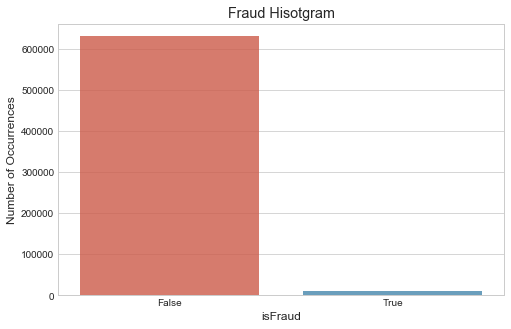

In [82]:
trans_count  = df_processed['isFraud'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(trans_count.index, trans_count.values, alpha=0.8)
plt.title('Fraud Hisotgram')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('isFraud', fontsize=12)
plt.show()

In [84]:
# df_before is old features dataframe
df_before = df.copy()
# df_after is new features dataframe
df_after = df_processed.copy()

In [85]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
accountNumber               641914 non-null object
accountOpenDate             641914 non-null datetime64[ns]
acqCountry                  641914 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null object
cardLast4Digits             641914 non-null object
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
customerId                  641914 non-null object
dateOfLastAddressChange     641914 non-null datetime64[ns]
echoBuffer                  641914 non-null object
enteredCVV                  641914 non-null object
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 non-null object
merchantC

In [86]:
df_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 34 columns):
accountNumber               641914 non-null object
accountOpenDate             641914 non-null datetime64[ns]
acqCountry                  641914 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null object
cardLast4Digits             641914 non-null object
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
dateOfLastAddressChange     641914 non-null datetime64[ns]
enteredCVV                  641914 non-null object
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 non-null object
merchantCountryCode         641914 non-null object
merchantName                641914 non-null object
posCondit

## Feature Analysis

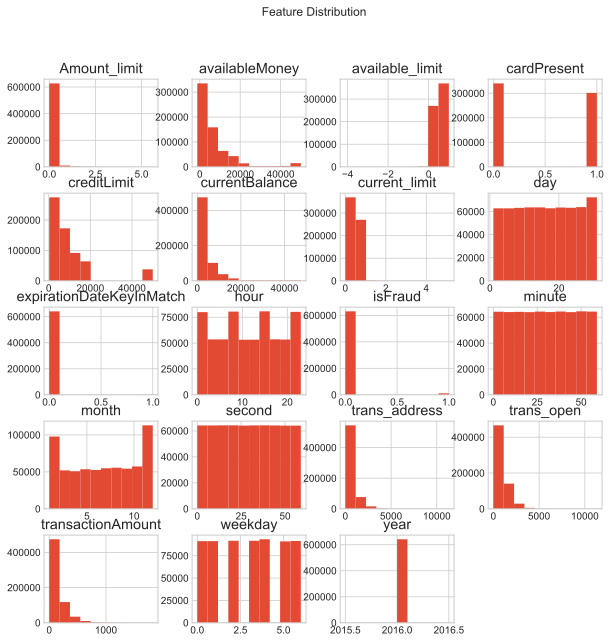

In [129]:
# Plot the histogram for every parameter
df_processed.hist(figsize = (10, 10))
plt.suptitle('Feature Distribution')
plt.show()

In [387]:
# f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# f.suptitle('Time of transaction vs Amount by class')

# ax1.scatter(X_train[:1000].transactionDateTime, X_train[:1000].transactionAmount)
# ax1.set_title('Train')

# ax2.scatter(X_test[:1000].transactionDateTime, X_test[:1000].transactionAmount)
# ax2.set_title('Test')

# plt.xlabel('Time (in Seconds)')
# plt.ylabel('Amount')
# plt.show()

### 1. Fraud Analysis

In [89]:
valid_data = df_after[df_after['isFraud']==False]
fraud_data = df_after[df_after['isFraud']==True]

In [90]:
fraud_data['transactionAmount'].describe()

count    11302.000000
mean       232.603744
std        189.654934
min          0.000000
25%         91.475000
50%        185.215000
75%        324.817500
max       1743.510000
Name: transactionAmount, dtype: float64

In [91]:
valid_data['transactionAmount'].describe()

count    630612.000000
mean        133.416128
std         145.583066
min           0.000000
25%          31.810000
50%          84.340000
75%         186.440000
max        1825.250000
Name: transactionAmount, dtype: float64

### 2. Time Analysis

In [93]:
var_list = ['transactionDateTime', 'transactionAmount', 'isFraud']
time_analysis = fraud_data[var_list].copy()
time_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11302 entries, 0 to 641874
Data columns (total 3 columns):
transactionDateTime    11302 non-null datetime64[ns]
transactionAmount      11302 non-null float64
isFraud                11302 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1)
memory usage: 275.9 KB


In [94]:
time_analysis = splitDatetime(time_analysis)
time_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11302 entries, 0 to 641874
Data columns (total 10 columns):
transactionDateTime    11302 non-null datetime64[ns]
transactionAmount      11302 non-null float64
isFraud                11302 non-null bool
year                   11302 non-null int64
month                  11302 non-null int64
day                    11302 non-null int64
hour                   11302 non-null int64
minute                 11302 non-null int64
second                 11302 non-null int64
weekday                11302 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(7)
memory usage: 894.0 KB


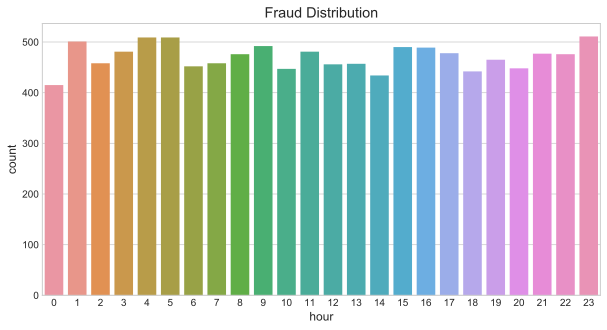

In [127]:
# time_analysis['Hour']=time_analysis['transactionDateTime'].hour
plt.figure(figsize=(10,5))
plt.title('Fraud Distribution')
sns.countplot(x='hour', data=time_analysis)
plt.show()

In [101]:
# sns.set_context("talk", rc={"lines.linewidth": 2})
# sns.set_style("whitegrid");
# sns.pairplot(data_analysis[:1000], hue="isFraud",size=3);

Ordinal — convert string labels to integer values 1 through k. Ordinal.

In [102]:
le = LabelEncoder()

def encode_cat(data):
    l = list(data.columns.where(data.dtypes!=np.number))
    cat_list = [x for x in l if str(x) != 'nan']
    for col in cat_list:
        data[col] = le.fit_transform(data[col])
        
    return data

In [103]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
accountNumber               641914 non-null object
accountOpenDate             641914 non-null datetime64[ns]
acqCountry                  641914 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null object
cardLast4Digits             641914 non-null object
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
customerId                  641914 non-null object
dateOfLastAddressChange     641914 non-null datetime64[ns]
echoBuffer                  641914 non-null object
enteredCVV                  641914 non-null object
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 non-null object
merchantC

In [104]:
# df_model_before is ready for modeling data with old features
df_model_before = encode_cat(df_before)

In [105]:
df_model_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
accountNumber               641914 non-null int64
accountOpenDate             641914 non-null int64
acqCountry                  641914 non-null int64
availableMoney              641914 non-null float64
cardCVV                     641914 non-null int64
cardLast4Digits             641914 non-null int64
cardPresent                 641914 non-null int64
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null int64
customerId                  641914 non-null int64
dateOfLastAddressChange     641914 non-null int64
echoBuffer                  641914 non-null int64
enteredCVV                  641914 non-null int64
expirationDateKeyInMatch    641914 non-null int64
isFraud                     641914 non-null int64
merchantCategoryCode        641914 non-null int64
merchantCity                64191

In [106]:
df_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 34 columns):
accountNumber               641914 non-null object
accountOpenDate             641914 non-null datetime64[ns]
acqCountry                  641914 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null object
cardLast4Digits             641914 non-null object
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
dateOfLastAddressChange     641914 non-null datetime64[ns]
enteredCVV                  641914 non-null object
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 non-null object
merchantCountryCode         641914 non-null object
merchantName                641914 non-null object
posCondit

In [107]:
# df_model_after is ready for modeling data with new features
df_model_after = encode_cat(df_after)

In [108]:
df_model_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 34 columns):
accountNumber               641914 non-null int64
accountOpenDate             641914 non-null int64
acqCountry                  641914 non-null int64
availableMoney              641914 non-null float64
cardCVV                     641914 non-null int64
cardLast4Digits             641914 non-null int64
cardPresent                 641914 non-null int64
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null int64
dateOfLastAddressChange     641914 non-null int64
enteredCVV                  641914 non-null int64
expirationDateKeyInMatch    641914 non-null int64
isFraud                     641914 non-null int64
merchantCategoryCode        641914 non-null int64
merchantCountryCode         641914 non-null int64
merchantName                641914 non-null int64
posConditionCode            64191

In [109]:
def train_test_data(df, random_state):
    features = [item for item in list(df.columns) if item not in ['isFraud']]
    return train_test_split(df[features],
                            df['isFraud'],
                            test_size=0.2, 
                            stratify=df['isFraud'],
                            random_state=random_state)

## Modeling with old features

In [114]:
def modelfit(alg, dtrain, dtest, predictors, printFeatureImportance=True):
    label = 'isFraud'
    #Fit the algorithm on the data
    clf = alg.fit(dtrain[predictors], dtrain[label])
        
    #Predict training set:
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
       
    #Print model report:
    print("\nModel Report")
    print("Number of Training Data : %d" % len(dtrain))
    print("Number of Testing Data : %d" % len(dtest))    
    print("Accuracy : %.4g" % metrics.accuracy_score(dtest[label].values, dtest_predictions))
    print("AUC Score (Test): %f" % metrics.roc_auc_score(dtest[label], dtest_predprob))
    print("Confusion Matrix: \n", metrics.confusion_matrix(dtest[label].values, dtest_predictions, labels=[0,1]))
    C = metrics.confusion_matrix(dtest[label].values, dtest_predictions, labels=[0,1])
    show_confusion_matrix(C, ['Valid', 'Fraud'])
              
    #Print Feature Importance:
    if printFeatureImportance:
        rcParams['figure.figsize'] = 10, 10
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=True)
        feat_imp.plot(kind='barh', title='Feature Importance')
        plt.ylabel('Feature')
#         plt.savefig('if.png')

    return clf

def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """

    
    rcParams['figure.figsize'] = 6, 6
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(6,6))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
#     plt.savefig('cm.png')
    plt.show()

### No time for parameter tunning

In [ ]:
# param = {     
#               "clf__n_estimators": np.arange(20, 80, 10),
#               "clf__max_depth": np.arange(5, 8, 1),
#               "clf__min_samples_split": np.arange(60,100,10),
#               "clf__min_samples_leaf": np.arange(50,70,10),
#               "clf__max_leaf_nodes": np.arange(6,10,1),
#               'clf__class_weight': [{0:1, 1:20}, {0:1, 1:25}],
#               "clf__bootstrap": [True, False],
#               "clf__criterion": ["gini", "entropy"]
#              }

# rf = Pipeline([
#              ('clf', RandomForestClassifier(random_state =20, max_features = 'sqrt'))
#              ])


# gs_rf = GridSearchCV(rf, param_grid=param,
#                            scoring='roc_auc',
#                            cv=5,
#                            verbose=1,
#                            n_jobs=-1)

# gs_rf.fit(X_train, y_train)

# print('Best parameter set: %s ' % gs_rf.best_params_)
# print('CV Accuracy: %.3f' % gs_rf.best_score_)

# clf = gs_rf.best_estimator_
# print('Test AUC: %.3f' % clf.score(X_test, y_test))

In [111]:
random_state = 1
X_train, X_test, y_train, y_test = train_test_data(df_model_before, random_state)


Model Report
Number of Training Data : 513531
Number of Testing Data : 128383
Accuracy : 0.9833
AUC Score (Test): 0.678790
Confusion Matrix: 
 [[126110     13]
 [  2136    124]]


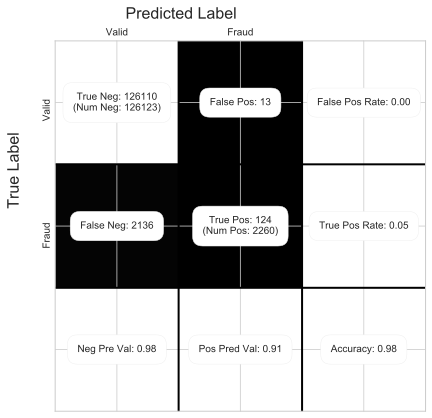

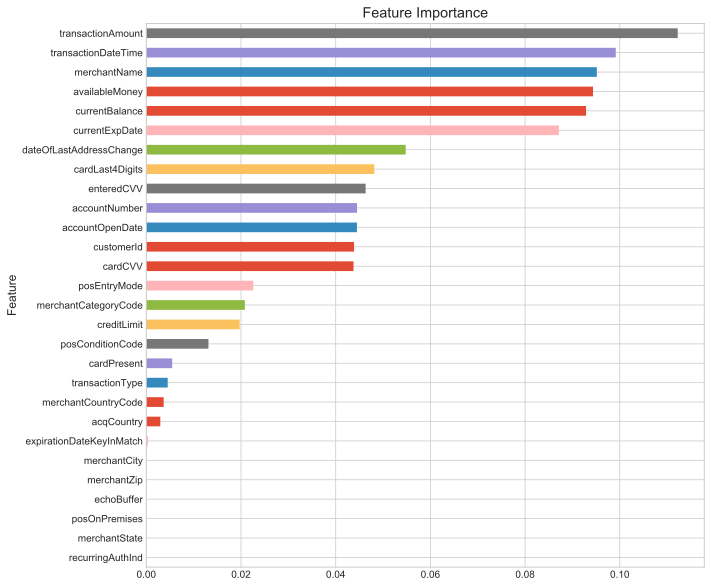

In [115]:
%config InlineBackend.figure_format = 'svg'

rf = RandomForestClassifier(random_state=random_state)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
predictors = list(X_train.columns.values)

clf = modelfit(rf, df_train, df_test, predictors, printFeatureImportance=True)

## Modeling with new features

In [122]:
random_state = 2
X_train, X_test, y_train, y_test = train_test_data(df_model_after, random_state)


Model Report
Number of Training Data : 513531
Number of Testing Data : 128383
Accuracy : 0.9828
AUC Score (Test): 0.637606
Confusion Matrix: 
 [[126120      3]
 [  2202     58]]


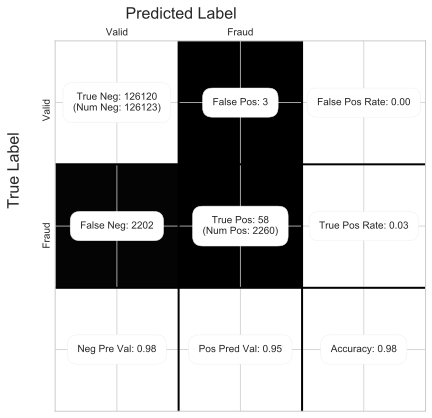

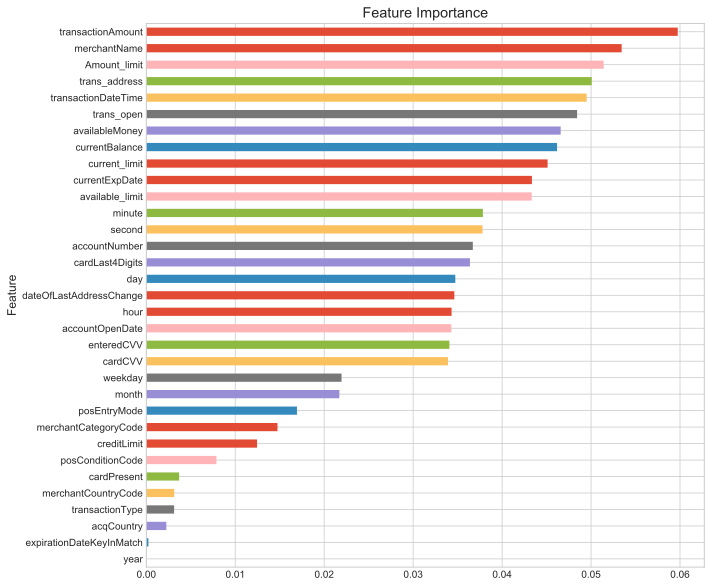

In [125]:
rf = RandomForestClassifier(random_state=random_state)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
predictors = list(X_train.columns.values)

clf = modelfit(rf, df_train, df_test, predictors, printFeatureImportance=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)


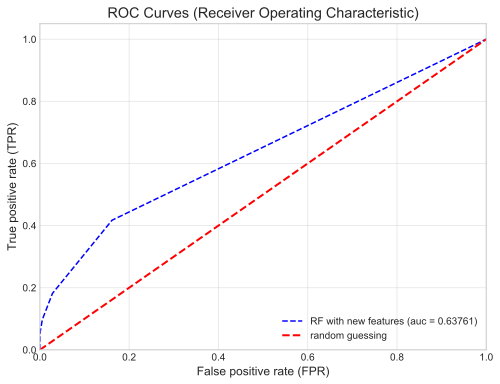

In [126]:
fig = plt.figure(figsize=(8, 6), dpi=100)

clf_labels = ['RF with new features']
all_clf = [clf]

colors = ['blue', 'magenta']
linestyles = ['--', ':']

for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    y_pred = clf.predict_proba(X_test)[:, 1]
    print(clf)    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    fnr = 1 - tpr
    
#     FPR : false positive rate = fp / fp + tn
#     FNR : false negative rate = fn / fn + tp
    
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.5f)' % (label, roc_auc))

plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='red',
         label='random guessing',
         linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('ROC Curves (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.show()

# Future Work if more time available
## 1. Other features and more feature analysis
absolute_time 
<br> day_of_year
<br>day_of_week
<br>month_of_year
<br>hour_of_day
<br>minute_of_hour
<br>weekends vs weekdays
<br>business hours and time of day
<br>seasons
<br>week of year number
<br>month
<br>year
<br>beginning/end of month (pay days)
<br>quarter
<br>days to/from an action event(distance)
## 2. Parameter Tunning 
## 3. Metric (Use diff based on the business requirement)
false positive
<br> false negative
## 4. Split train and test data based on datetime
Make sure train data datetime is before test data
## 5. More feedback from Business Analyst
Figure out what feature is more important and how model works to improve the entire modeling process
## 6. Fix proxy issue and Programatically download data from github
I can download data from github in my own desktop. No time to fix proxy problem since I used corporate laptop.